In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#from scipy import ttest_ind,ttest_rel
from scipy import stats


In [2]:
#scipy.ttest_ind()

In [3]:
data = pd.read_csv("adult.csv",na_values="?",skipinitialspace =True)
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [6]:
data['workclass'].unique()

array(['Private', 'Local-gov', nan, 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [7]:
data['workclass'].nunique()

8

# EDA

In [8]:
data.shape

(48842, 15)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
data.describe(include='O').T

,count,unique,top,freq
workclass,46043,8,Private,33906
education,48842,16,HS-grad,15784
marital-status,48842,7,Married-civ-spouse,22379
occupation,46033,14,Prof-specialty,6172
relationship,48842,6,Husband,19716
race,48842,5,White,41762
gender,48842,2,Male,32650
native-country,47985,41,United-States,43832
income,48842,2,<=50K,37155


In [12]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [13]:
data=data.dropna()

In [14]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [16]:
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [17]:
data['income']=data['income'].map({'<=50K': 0, '>50K': 1})
data.head(30)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,1
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0


In [18]:
data_num=data.drop(["educational-num","income"],axis=1)
data_num.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


# EDA

# Univariate Analysis

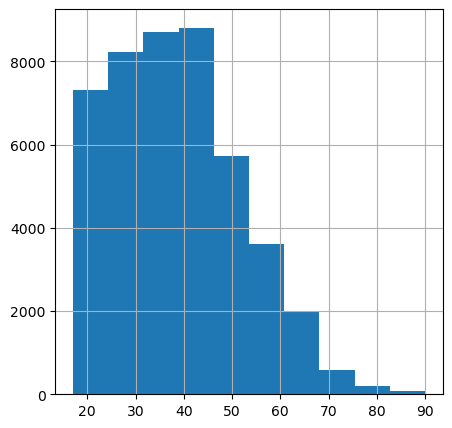

In [19]:
data['age'].hist(figsize=(5,5))
plt.show()

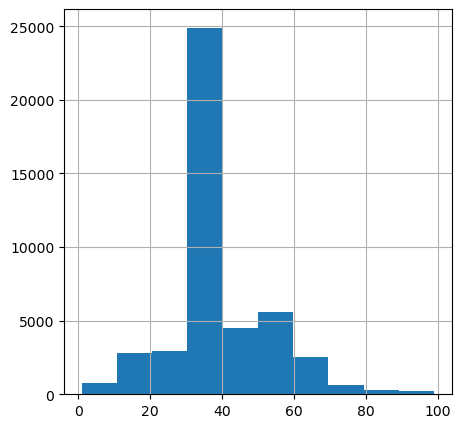

In [20]:
data['hours-per-week'].hist(figsize=(5,5))
plt.show()

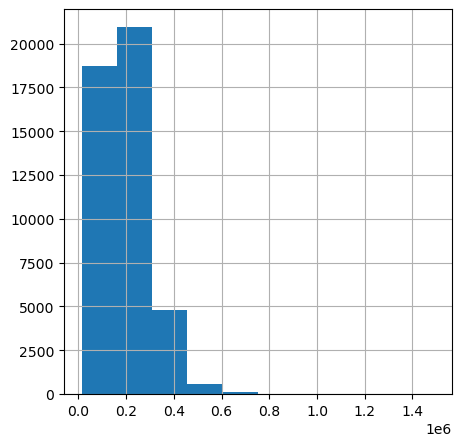

In [21]:
data['fnlwgt'].hist(figsize=(5,5))
plt.show()

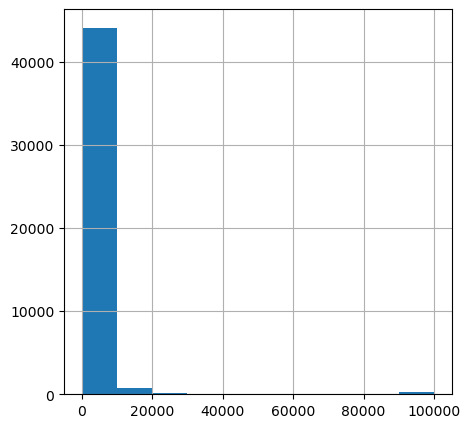

In [22]:
data['capital-gain'].hist(figsize=(5,5))
plt.show()

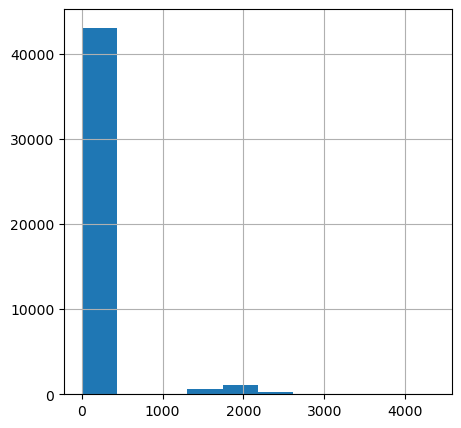

In [23]:
data['capital-loss'].hist(figsize=(5,5))
plt.show()

# Bi Variate Analysis

# Relation between capital gain and capital loss

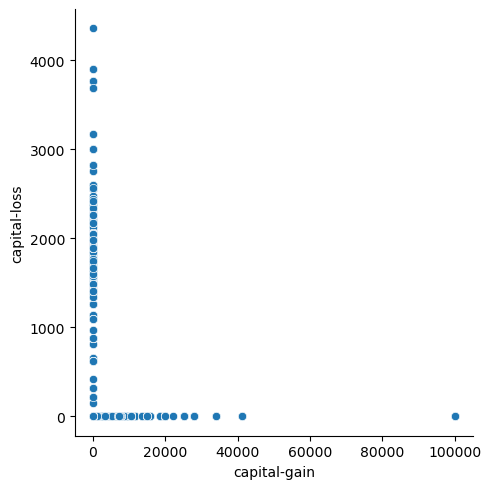

In [24]:
sns.relplot(x='capital-gain',y='capital-loss',data=data)
plt.xlabel=('capital-gain')
plt.ylabel=('capital-loss')
plt.show()

# Countplot

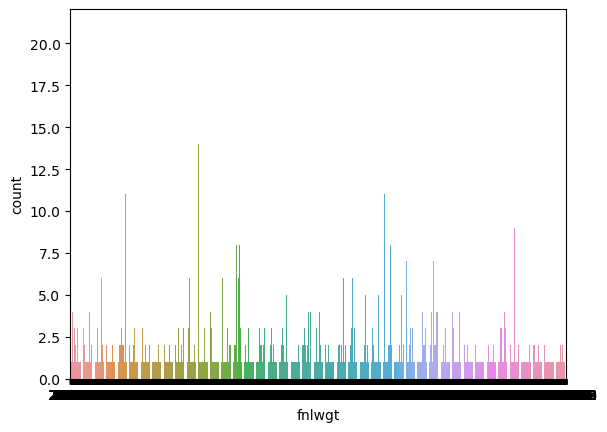

In [25]:
sns.countplot(x="fnlwgt",data=data)
plt.show()

# 5.2.1 AGE

#  Boxplot(rel with income)

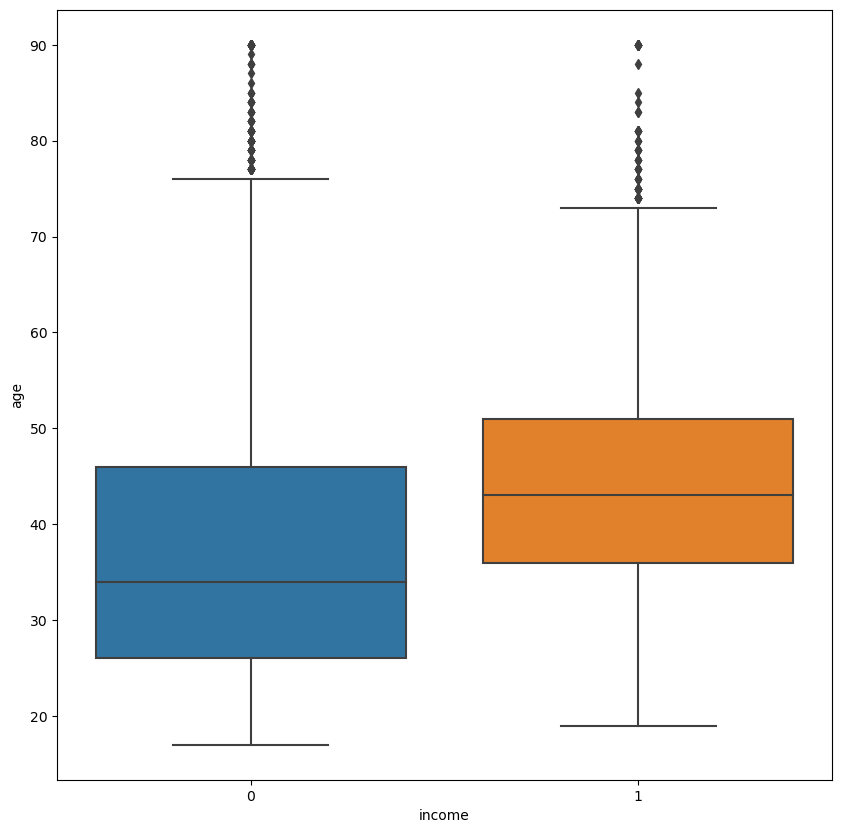

In [26]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='age',data=data)
plt.show()

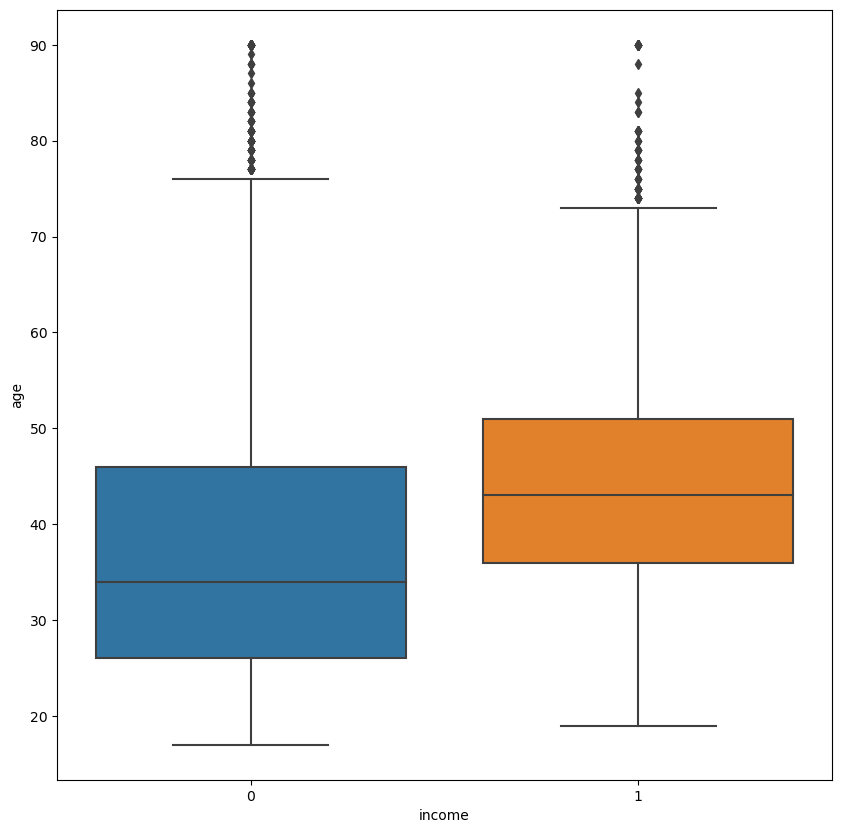

In [27]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=data)
plt.show()

In [28]:
data[['income','age']].groupby(['income'],as index=False).mean().sort_values(by='age',ascending=False)

SyntaxError: invalid syntax (2513943204.py, line 1)

In [ ]:
import random

data=data[(np.abs(stats.zscore(data["age"]))<3)]

income_1=data[data['income']==1['age']]
income_0=data[data['income']==0['age']]

income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)

In [ ]:
from scipy.stats import ttest_ind
ttest,pval=ttest_ind(income_1,income_0,eual_var=False)
print("ttest",ttest)
print("p value",pval)

if p_val<0.05:
    print("reject null hypothesis")
    else"
    print("accept null hypothesis")

In [ ]:
import random

data=data[(np.abs(stats.zscore(data["age"]))<3)]
 
income_1=data[data['income']==1['age']]
income_1=data[data['income']==0['age']]
    
income_0= income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)
    

In [ ]:
from scipy.stats import ttest_ind
ttest,pval=ttest_ind(income_1,income_0,equal_var=False)
print("ttest",ttest)
print("p value",pval)

if p<0.5:
    print("reject null hyp")
else:
    print("accept null hyp")
        

In [ ]:
import random

data=data[(np.abs(stats.zscore(data["age"]))<3)]

income_1=data[data["income"]==1["age"]]
income_0=data[data["income"]==0["age"]]

income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)


from scipy.stats import ttest_ind
ttest,pval=ttest_ind(income_0,income_1,equal_var=False)
print("ttest",ttest)
print("p value",pval)

if p<0.05:
    print("reject null hypothesis")
    else:
        print("accept null hypothesis")

In [ ]:
import random

data=data[(np.abs(stats.zscore(data["age"]))<3)]

income_1=data[data["income"]==1["age"]]
income_0=data[data]"income"]==0["age"]]


income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)

# <!--  -->5.2.2 Hours per week

In [ ]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(x="income",y="hours-per-week",data=data)
plt.show()

# 2.  Description

# 3. Testing Hypothesis

# Final weight with Income

In [ ]:
data=data[(np.abs(stats.zscore(data["fnlwgt"]))<3)]

income_1=data[data["income"]==1["fnlwgt"]]
income_0=data[data["income"]==0["fnlwgt"]]

income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)


ttest,pval=ttest_ind(income_0,income_1,equal_var=False)
print("ttest",ttest)
print("p value",pval)

if pval<0.05:
    print("reject null hypothesis")
    else:
        print("accept null hypothesis")


# Final Conclusion

# 5.2.3 Capital Gain

# Boxplot (rel of income with Capital Gain)

In [ ]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(x="income",y="capital-gain",data=data)
plt.show()

# Description

# Hypothesis testing

In [ ]:
data=data[(np.abs(stats.zscore(data["capital-gain"]))<3)]

income_1=data[data["income"]==1["capital-gain"]]
income_0=data[data["income"]==0["capital-gain"]]

income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)


ttest,pval=ttest_ind(income_0,income_1,equal_var=False)
print("ttest",ttest)
print("p value",pval)

if p<0.05:
    print("reject null hypothesis")
    else:
        print("accept null hypothesis")

#  Conclusion

# 5.2.5 Capital Loss

#  Boxplot (rel of income with Capital loss)

In [ ]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(x="income",y="capital-loss",data=data)
plt.show()

# Description

# Hypothesis and testing

In [ ]:
import random

data=data[(np.abs(stats.zscore(data["capital-loss"]))<3)]

income_1=data(data["income"]==1["capital-loss"])
income_0=data(data["income"]==0["capital-loss"])

income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.tolist()
income_1=random.sample(income_1,100)


ttest,pvalue=ttest_ind(income_0,income_1,equal_var=False)
print("ttest",ttest)
print("p value",pval)

if p <0.05:
    print("reject null hypothesis")
    else:
        print("accept null hypothesis")

# Conclusion

# 5.2.6 Workclass

# Boxplot (rel between income with workclass)

In [ ]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(x="workclass",y="income",data=data)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
total=float(len(data["income"]))

ax=sns.countplot(x="workclass",hue="income",data=data)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.getx().p.get_width()/2.,
            height+3,
            '{:1.2f}'.format((height/total)*100)
            ha="centre")
            
plt.show()
    

In [ ]:
plt.figure(figsize=(12,10))
total = float(len(data["income"]) )

ax = sns.countplot(x="workclass", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.getx()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# Chi Square test

# Contingency table

In [ ]:
c_t= pd.crosstab(data['workclass'].sample(frac=0.02,replace=True,random_state=1,data['income'].sample(frac=0.02,replace=True,random_state=1,Margin=False))
                 c_t

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat,p,dof,expected=chi2_contingency(c_t)
print('dof=%d'%dof)
print('p_value',p)
print(expected)

# interpret test statistic
prob=0.95
critical= chi2.ppf(prob,dof)
print('probability=%.3f,critical=%.3f,stat=%.3f'%(prob,critical,stat))
if abs(stat)>=critical:
    print('Dependent(reject H0)')
    else:
        print('Independent(fail to reject H0)')


# Education

# Relation plot with Income

In [ ]:
figure=plt.figure(figsize(5,5))
total=float(len(data['income']))

ax=sns.countplot(x='education',y='income',data=data)
for p in ax.patches:
    height=p.get_height()
    ax.text (p.get_x()+p.get_width()/2.,
    height+3,
    '{:1.2f}'.format((height/total)*100),
    ha="centre")
    
    plt.show()

In [ ]:
plt.figure(figsize=(10,5))
total = float(len(data["income"]) )

ax = sns.countplot(x="education", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# Chi square testing

In [ ]:
c_t=pd.crosstab(data['income'].sample(frac=0.02,replace=True,random_state=1,data['education'].sample(frac=0.02,replace=True,random_state=1,Margin=False))

c_t
                

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stats,p,dof,expected=chi2_contingency(c_t)
print('dof %d'%d)
print('p_value',p)
print(expected)

#interpret test statistic
p=0.95
critical=stat,prob(chi2_contingency)
print('probability=%.3f,critical=%.3f,stat=%.3f'% prob,critical,stat))
if abs(stat)>=critical:
    print('dependent(reject H0)')
    else:
        print('Independent(fail to reject H0)')

# Final Conclusion

# Marital Status

# Rel plot of Income with Marital Status

In [ ]:
figure=plt.figure(figsize(5,5))
total=float(len(data['income'])
            
ax=sns.countplot(x='marital-status',data=data)
  for p in ax.patches:
            height=p.get_height()
            ax.text(p.get_x)+p.get_width()/2.,
            height+3,
            '{:1.2f}'.format((height/total)*100),
            ha="centre"
            
plt.show()

# Chi square testing and Hypothesis
# contingency Table

In [ ]:
c_t=pd.crosstab(data['income'].sample(frac=0.02,replace=True,random_state=1),data['marital-status'].sample(frac=0.02,replace=True,random_state=1,Margin=False))
c_t

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat,p,dof,expected=chi2_contingency(c_t)
print('dof%d'%dof)
print('p_value',p)
print('expected')

#interpret test statistic
p=0.95
critical=chi2.ppf(prob,dof)
print('probability =%:.3f'prob,'critical =%:.3f' critical,'stat= %:.3f' stat % prob,critical,stat))
if abs(stat)>= critical:
    print(Dependent('reject H0'))
    else:
        print(Independent'Fail to reject H0)

# Occupation

# Rel plot of occupation with income

In [ ]:
figure=plt.figure(figsize=(5,5))
total=float(len(data['income']))

ax=sns.countplot(x='occupation',data=data)
for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    '{:1.2f}'.format(height/total)*100(),
    height+3,
    ha="centre"
    
plt.show()    

# description

# Chi2 Test and Hypothesis testing

In [ ]:
c_t= pd.crosstab(data['income'].sample(frac=0.02,replace=True,random_state=1,data['occupation'.sample(frac=0.02,replace=True,random_state=1,Margin=False))
 c_t                                                                                 
                    

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stats,p,dof,expected=chi2_contingency(c_t)
print('dof %d'%d)
print('p_value',p)
print ('expected')

#interpret test statistic
p=0.95
critical=chi2.ppf(prob,dof)
print('probability=%.3f','critical=%.3f','stat=%.3f'%(prob,critical,stat))
if abs(stats)>= critical:
    print(Dependent('reject H0'))
    else:
        print(Independent('fail to reject H0 ))

# Conclusion

# Race

# Rel plot with Income

In [ ]:
figure=plt.figure(figsize=(5,5))
total=float(len(data['income']))

ax=sns.countplot(x='race',hue='income',data=data)
for p in ax.patches:
    height=p.get_height(),
    ax.text(p.get_x()+(p.get_width()/2.,
                       height+3,
                       '{:1.2f}'.format((height/total)*100),
                       ha="centre")
        
            
            
plt.show()

# Description

# Chi2 test and Hypothesis

In [ ]:
c_t=pd.crosstab(data['income'].sample(frac=0.02,replace=True,random_state=1,data['race'].sample(frac=0.02,replace=True,random_state=1,Margin=false))
 c_t               
        

In [ ]:
stats,p,dof,prob=chi2_contingency
print('dof =%d'%dof)
print('p_value',p)
print('expected')

#interpret test statistic
p=0.95
critical =chi2.ppf(prob,dof)
print('probability=%.3f,critical=%.3f,stat=%.3f' %(prob,critical,stat))
if abs(stat)>= critical:
    print(Dependent('reject H0))
                    else:
                    print(Independent('fail to reject H0'))

# Final conclusion

# Gender

# Rel plot of gender with income

In [ ]:
figure=plt.figure(figsize=(5,5))
total=float(len(data['income']))

ax=sns.countplot(x='gender',hue='income',data=data)
for p in ax.patches:
    height=p.get_height(),
    ax.text(p.get_x()+p.get_width/2.,
    height+3,
    '{:.2f}'.format((height/total)*100),
    ha="centre")
    
    plt.show()

# Description

# Chi2 test and Hypothesis

In [ ]:
stat,p,dof,expected=chi2_contingency
print('dof=%d'%dof)
print('p_value',p)
print('expected')

#interpret test statistic
p=0.95
critical= chi2.ppf(prob,dof)
print('probability=%.3f','critical=%.3f','stat=%.3f' % (prob,critical,stat))
if abs(stat)>= critical:
    print(Dependent('reject H0'))
    else:
        print(independent('fail to reject H0'))

# Final Conclusion

# Native - country

# Rel plot of native country with income

In [ ]:
plt.figure(figsize=(10,10))
total=float(len(data))

ax=sns.countplot(x='native-country',hue='income',data=data)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width)/2.,
    height+3,
    '{:.2f}'.format((height/total)*100),
    ha="centre")
    
plt.show()

# Chi 2 testing and Hypothesis

In [ ]:
c_t=pd.crosstab(data['native-country'].sample(frac=0.02,replace=True,random_state=1),data['income'].sample(frac=0.02,replace=True,random_state=1,margin+False))
c_t

In [ ]:
stat,p,dof,expected=chi2_contingency
print('dof=%d'% dof)
print('p_value',p)
print('expected')

#interpret test statistic
p=0.95
critical=chi2.ppf(prob,dof)
print('probability=%.3f','critical=%.3f','stat=%.3f'%(prob,critical,stat)
 if abs(stat)>= critical:
    print(Dependent('reject H0'))
      else:
      print(independent('fail to reject H0'))

# Final Conclusion

# Multi - Variate

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data_num.corr(),annot=True,linewidths=.5,cmap="Blues")
plt.title('Heatmap showing Correlation of Multi Variate Data')
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='income',y='hours-per-week',hue='gender',data=data)
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='income',y='age',hue='gender',data=data)
plt.show()

# Other Multi Variate Analysis

In [ ]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2,1,1)
sns.stripplot(x='age', y= 'capital-gain',data=data,jitter=0.2,ax=ax1)
ax1.set_xlabel('Age',fontsize=12)
ax1.set_ylabel('Capital Gain',fontsize=12)

ax2 = fig.add_subplot(2,1,2)
sns.stripplot(x='age',y='capital-gain',data=data,jitter=0.2,ax=ax2)
ax2.set_xlabel('Age',fontsize=12)
ax2.set_ylabel('Capital Gain',fontsize=12)
ax2.set_ylim(0,40000)

plt.tight_layout()
plt.show()



In [ ]:
fig=plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,1,1)
sns.stripplot(x='age',y='capital-gain',data=data,jitter=0.2,ax=ax1)
ax1.set_xlabel('Age',fontsize=12)
ax1.set_ylabel('Capital Gain',fontsize=12)

ax2= fig.add_subplot(2,1,2)
sns.stripplot(x='age',y= 'capital-gain',data=data,jitter=0.2,ax=ax2)
ax2.set_xlabel('Age',fontsize=12)
ax2.set_ylabel('Capital Gain',fontsize=12)
ax2.set_ylim(0,40000)

plt.tight_layout()
plt.show()

# Summary statistics

In [ ]:
data["capital_change"] =data["captial-gain"]- ["capital-loss"]
data["capital_change"].describe()

# Distribution

In [ ]:
data["capital_change"].hist(figsize=(10,5))
plt.show()

# Description

# Hypothesis testing income and capital change

In [ ]:
# null - there is no difference between income and capital change
#alternate -there is difference in income and capital change

In [ ]:
data= data[(np.abs(stats.zscore)(data['age']))<3]

income_0=data[data['income']==0 [data['capital_change']]
income_1=data[data['income']==1[data]['capital_change']]
              
income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)
    
ttest,pval=ttest_ind(income_1,income_0,equal_var=0)
print('ttest',ttest) 
print('p_val',p)
              
if p<0.05:
              print('we reject null hypothesis')
              else:
              print('we accept null hypothesis')

# Final Conclusion

# Complete conclusion of the EDA

# Selecting features

In [ ]:
data["gender"]=data["gender"].map({"Male":0}{"Female":1})
                                  
data["marital-status"] =data["marital-status"].replace(["Never-married","Divorced","Seperated","Widowed"],'Single')
data["marital-status"] =data["marital-status"].replace(["Married-civ-spouse","Married-spouse-absent","Married-AF-spouse"],'Married')
data["marital-status"] =data["marital-status"].map({"Married":1,"Single":0}) 
data["marital-status"]=data["marital-status"].astype(int)

data.drop(labels=["workclass","education","occupation","relationship","race","native-country","capital-change"],axis=1,Inplace=True)

In [ ]:
data.head()

# Model Building

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbours import KNeighboursClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naives_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score , StratifiedKFold, learning_curve, train_test_split,KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

ModuleNotFoundError: No module named 'sklearn.neighbours'

In [ ]:
array = data.values
array

In [32]:
X = array[:,0:8]
Y = array[:,8]
print('Split data: X')
print(X)
print('Split data: Y')
print(Y)

NameError: name 'array' is not defined

In [33]:
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_test,X_validation,Y-test,Y-validation= train_test_split()(X,Y,test_size=validation_test)

#params for random forest
num_trees= 100
max_features = 3

# check Algorithms
models=[]
model.append(('LR',LinearRegression()))
model.append(('KNN',KneighboursClassifier()))
model.append(('CART',DecisionTreeClassifier()))
model.append(('NB',GaussianNB()))
model.append(('RF',RandomForestClassifier(n_estimators=num_tree,max_features=max_features,random_state=seed)))

models

SyntaxError: cannot assign to operator (3564878115.py, line 5)

In [34]:
# evaluate each model in turn
results = []
names =[]
for name,model in models:
    kfold= KFold(n_splits=10)
    cv_results=cross_validation_score(model,X_train,Y-train,cv = kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)
    

NameError: name 'models' is not defined

In [35]:
results

[]

In [36]:
figure = plt.fig()
figure.subtilte('Algorithm comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ste.xsticklabel(names)
plt.show()



AttributeError: module 'matplotlib.pyplot' has no attribute 'fig'

# Algo Tuning

1.best n_estimator = 250
2.best max_feature = 5

Tune Random Forest
3.n_estimators = np.array([50,100,150,200,250])
4.max_features = np.array([1,2,3,4,5])
5.param_grid = dic(n_estimators=n_estimators,max_features=max_features)
6.model= RandomForestClassifier
7.kfold=Kfolds(n_splits=num_folds,random_state=seed)
8.grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
9.grid_result=grid.fit(X_train,Y_train)
10.print("Best %f using %s" % (grid_result.best_score_,grid_result.best_params_))
11.means = grid_results.cv_results_['mean_test_score']
12.std = grid_results.cv_results['std_test_score']
13. params= grid_cv_results.cv_results['params_test_score']
14.for mean,stdev,param in zip(means,std,params):

print("%f (%f) with: %r" %(mean,std,params))

# Final Model

In [37]:
random_forest = RandomForest(n_estimators=100)
random_forst.fit(X_train,Y_train)
predictions = random_forest.predict(X_validation)
print=(Accuracy = "%s%%"% (100*accuracy_score(Y_validation,predictions)))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

SyntaxError: invalid syntax (648069656.py, line 4)